<a href="https://colab.research.google.com/github/prashanta4coursera/Panda-EDA-Project/blob/master/1000movie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step 1: Import all the libraries**

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Step 2 : Read the data**

In [112]:
raw_movie = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/1000%20movies%20data.csv', sep=',', parse_dates=['Year'], index_col = 'Rank')
raw_movie.head(3)

,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Rank,,,,,,,,,,,
1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014-01-01,121,8.1,757074,333.13,76.0
2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012-01-01,124,7.0,485820,126.46,65.0
3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016-01-01,117,7.3,157606,138.12,62.0


**Step 3 : Look into the data**

In [113]:
movie_df = raw_movie.copy()
movie_df.describe()

,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,191.000000,9.000000,1.791916e+06,936.630000,100.000000


In [114]:
movie_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1 to 1000
Data columns (total 11 columns):
Title                 1000 non-null object
Genre                 1000 non-null object
Description           1000 non-null object
Director              1000 non-null object
Actors                1000 non-null object
Year                  1000 non-null datetime64[ns]
Runtime (Minutes)     1000 non-null int64
Rating                1000 non-null float64
Votes                 1000 non-null int64
Revenue (Millions)    872 non-null float64
Metascore             936 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(2), object(5)
memory usage: 93.8+ KB


**Step 4: Let's remove missing values**

In [115]:
movie_df.isnull().sum()

Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

In [116]:
movies = movie_df.copy()
movies.dropna(axis = 0, how ='any', inplace = True)
movies.isnull().sum()
movies.shape

(838, 11)

**Step 5: Lets Check if there is any duplicate value**

In [117]:
movies[movies.duplicated()]

,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Rank,,,,,,,,,,,


**Step 6: Movie data is OK for EDA, let's perform**

In [118]:
movies.head(1)

,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Rank,,,,,,,,,,,
1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014-01-01,121,8.1,757074,333.13,76.0


**Q1. Which are the longest duration movies ?**

**Answer :**

In [119]:
# we choose the original dataframe that includes the NaN values.

long_movies = movie_df[['Title','Runtime (Minutes)']]
long_movies.sort_values(by = ['Runtime (Minutes)','Title'], ascending = [False,True])[:10]

,Title,Runtime (Minutes)
Rank,,
829,Grindhouse,191
89,The Hateful Eight,187
966,Inland Empire,180
312,La vie d'Adèle,180
83,The Wolf of Wall Street,180
268,Cloud Atlas,172
431,3 Idiots,170
37,Interstellar,169
76,Pirates of the Caribbean: At World's End,169


**Q2. Which movies earned the maximum revenues ?**

**Answer :** *Top 10 movies by revenue*

In [120]:
max_revenue = movies[['Title','Revenue (Millions)']].copy()
max_revenue.sort_values(by = ['Revenue (Millions)','Title'], inplace = True, ascending = False)
max_revenue[:10]

,Title,Revenue (Millions)
Rank,,
51,Star Wars: Episode VII - The Force Awakens,936.63
88,Avatar,760.51
86,Jurassic World,652.18
77,The Avengers,623.28
55,The Dark Knight,533.32
13,Rogue One,532.17
120,Finding Dory,486.29
95,Avengers: Age of Ultron,458.99
125,The Dark Knight Rises,448.13


**Q3. Which years have maximum movies from the list?**

**Answer :**

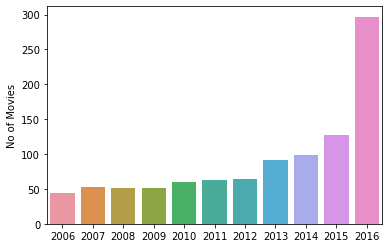

In [121]:
year_movie = pd.DataFrame(movie_df['Year'].dt.year.value_counts(), index = None)
year_movie.reset_index(inplace=True)
year_movie.rename(columns = {'index':'Year','Year':'No of Movies'}, inplace = True)
year_movie.sort_values(by=['Year'],inplace = True)
year_movie.set_index('Year', inplace = True)

sns.barplot(data = year_movie, x = year_movie.index.values, y = 'No of Movies')
plt.show()

**Creating List of all the Actors in the 1000 movie database**

In [168]:
movie_actor = movie_df.Actors.copy()

movie_actor = movie_actor.str.replace(', ',',')
movie_actor = list(movie_actor.str.split(','))

movie_actor_list = list(set(x for y in movie_actor for x in y))
movie_actor_list

['Dolph Lundgren',
 'Bella Thorne',
 'George Lopez',
 'Naomi Watts',
 'Cheryl Hines',
 'Erika Linder',
 'Eric Winter',
 'Dane Cook',
 'Steven Krueger',
 'Oaklee Pendergast',
 'Peter Facinelli',
 'Callie Hernandez',
 'Ryan Reynolds',
 'John Travolta',
 'Nicholas Galitzine',
 'Kevin McKidd',
 'Dakota Johnson',
 'Derek Jeter',
 'Amy Ryan',
 'Martin McCann',
 'Rory Cochrane',
 'Mark Boone Junior',
 'Meryl Streep',
 'Simon Pegg',
 'Aidan Gillen',
 'Amanda Righetti',
 'Fiona Gordon',
 'Bel Powley',
 'Don Cheadle',
 'Liam McMahon',
 'Jenna Dewan Tatum',
 'Rachel Dratch',
 'Anthony Anderson',
 'Imelda Staunton',
 'Penélope Cruz',
 'Taron Egerton',
 'Vincent Ebrahim',
 'Ji-min Han',
 'Judi Dench',
 'Alycia Debnam-Carey',
 'Kat Dennings',
 'Austin Abrams',
 'Laura Ramsey',
 'Andy Garcia',
 'Jason Isaacs',
 'Hristos Passalis',
 'Kate Mara',
 'Michelle Yeoh',
 'Storm Acheche Sahlstrøm',
 'Min-hee Kim',
 'Terrence Howard',
 'Mathieu Amalric',
 'John Turturro',
 'Suzanne Clément',
 'Elisabeth Moss',

**Creating list of all Genre in the 1000 movie list**

In [123]:
genre_list = movie_df.Genre.copy()
genre_list = list(genre_list.str.split(','))

genre_list_flat = list(set(x for y in genre_list for x in y))

genre_list_flat

['Comedy',
 'Crime',
 'Western',
 'Mystery',
 'Drama',
 'Romance',
 'Action',
 'History',
 'Musical',
 'War',
 'Sci-Fi',
 'Family',
 'Thriller',
 'Animation',
 'Music',
 'Biography',
 'Horror',
 'Adventure',
 'Fantasy',
 'Sport']

**Genre based revenues table**

Total revenue, Total movies & Revenue earned for each genre below : 

In [193]:
genre_revenue = []
genre_movies = []

for x in genre_list_flat : 
  genre_revenue.append(movie_df[movie_df.Genre.str.contains(x)]['Revenue (Millions)'].sum())
  genre_movies.append(movie_df[movie_df.Genre.str.contains(x)]['Revenue (Millions)'].count())

d = {'Genre':genre_list_flat,'Revenue (Millions)': genre_revenue,'No of Movies':genre_movies}
genre_df = pd.DataFrame(d).sort_values(by = ['Revenue (Millions)','Genre'], ascending = [False,True]).reset_index(drop = True)
genre_df['Revenue (Millions)/ Movie'] = genre_df['Revenue (Millions)'] / genre_df['No of Movies']
genre_df.round({'Revenue (Millions)/ Movie':2})

,Genre,Revenue (Millions),No of Movies,Revenue (Millions)/ Movie
0,Adventure,38852.61,252,154.18
1,Action,35605.42,286,124.49
2,Drama,21931.45,440,49.84
3,Comedy,19316.45,255,75.75
4,Sci-Fi,14910.78,110,135.55
5,Fantasy,12262.06,93,131.85
6,Thriller,10645.32,153,69.58
7,Animation,8987.50,47,191.22
8,Crime,8034.62,130,61.80
9,Family,6182.61,49,126.18


**Top 20 movies from each Genre**

In [124]:
#Top movies in each Gerne
top_movie = []
for x in genre_list_flat : 
  top_movie.append(movie_df.loc[movie_df['Genre'].str.contains(x)]['Title'][0:1].values)

new_list = list(x for y in top_movie for x in y)

d = {'Genre': genre_list_flat,'Top Movie': new_list}
pd.DataFrame(d)

,Genre,Top Movie
0,Comedy,Sing
1,Crime,Hounds of Love
2,Western,The Magnificent Seven
3,Mystery,Prometheus
4,Drama,La La Land
5,Romance,Passengers
6,Action,Guardians of the Galaxy
7,History,Hidden Figures
8,Musical,Mamma Mia!
9,War,Inglourious Basterds


**Top 20 actors based on no of movies acted**

In [125]:

noofmovies = []
for x in movie_actor_list : 
  noofmovies.append(movie_df['Actors'].str.contains(x).sum())
actor_movie_dict = {'Actor':movie_actor_list, 'No of Movies':noofmovies}
pd.DataFrame(actor_movie_dict).sort_values(by=['No of Movies','Actor'],ascending = [False,True]).reset_index(drop = True)[:20]

,Actor,No of Movies
0,Mark Wahlberg,15
1,Hugh Jackman,14
2,Brad Pitt,13
3,Christian Bale,13
4,Anne Hathaway,12
5,Channing Tatum,12
6,Johnny Depp,12
7,Michael Fassbender,12
8,Robert Downey Jr.,12
9,Scarlett Johansson,12


**Top 20 actors based on total revenues earned**

In [127]:

actor_revenue = []
for x in movie_actor_list : 
  actor_revenue.append(movies[movies.Actors.str.contains(x)]['Revenue (Millions)'].sum())

actor_revenue_dict = {'Actor':movie_actor_list,'Revenue':actor_revenue}
df_actor_revenue = pd.DataFrame(actor_revenue_dict).sort_values(by=['Revenue','Actor'],ascending = [False,True])
df_actor_revenue.reset_index(drop = True)[:20]

,Actor,Revenue
0,Robert Downey Jr.,3147.37
1,Jennifer Lawrence,2191.82
2,Chris Evans,1949.01
3,Scarlett Johansson,1874.97
4,Johnny Depp,1699.91
5,Christian Bale,1653.19
6,Anne Hathaway,1647.47
7,Liam Hemsworth,1641.60
8,Shia LaBeouf,1615.88
9,Dwayne Johnson,1598.09


**Revenues earned year on year by these 1000 movies**

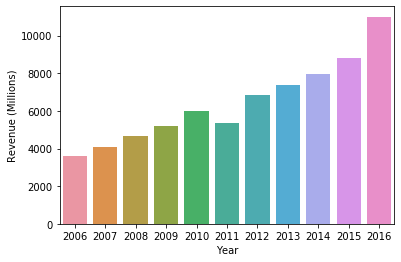

In [126]:
yearly_revenue = movies.groupby(movies['Year'].dt.year)[['Revenue (Millions)']].sum().reset_index()
sns.barplot(x = 'Year', y = 'Revenue (Millions)',data = yearly_revenue)
plt.show()

**No of movies for each rating**

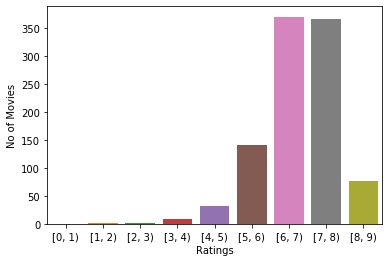

In [130]:
rating_df = movie_df[['Title','Rating']].copy()
bins = np.arange(10)
bins
rating_df['Rate_Bins'] = pd.cut(rating_df.Rating, bins = bins, right = False)
rating_df_bins = rating_df.groupby('Rate_Bins',as_index=False).count()
rating_df_bins.rename(columns = {'Rate_Bins':'Ratings','Rating': 'No of Movies'}, inplace = True)
sns.barplot(x = 'Ratings',y = 'No of Movies',data = rating_df_bins)
plt.show()

**Revenues earned for each movie ratings available**

[]

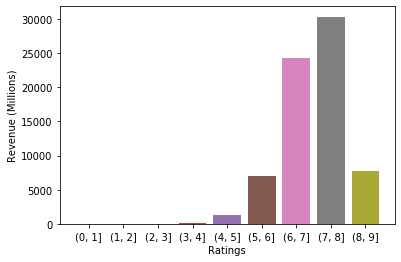

In [131]:
rating_rev_df = movies[['Rating','Revenue (Millions)']].copy()
rating_rev_df['Rate_Bins'] = pd.cut(rating_rev_df.Rating, bins = bins)
rating_rev = rating_rev_df.groupby('Rate_Bins',as_index = False)[['Revenue (Millions)']].sum()
rating_rev.columns = ['Ratings','Revenue (Millions)']
sns.barplot(x = 'Ratings', y = 'Revenue (Millions)', data = rating_rev)
plt.plot()

**Check for relations if any?**


> **Heatmap**


> **Pairplot**






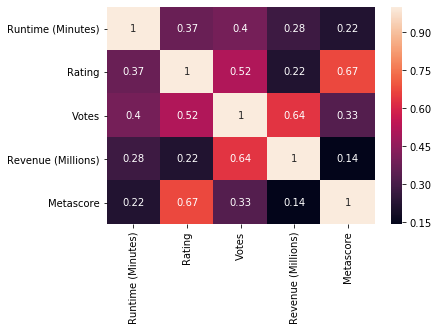

In [128]:
sns.heatmap(movies.corr(),annot = True)

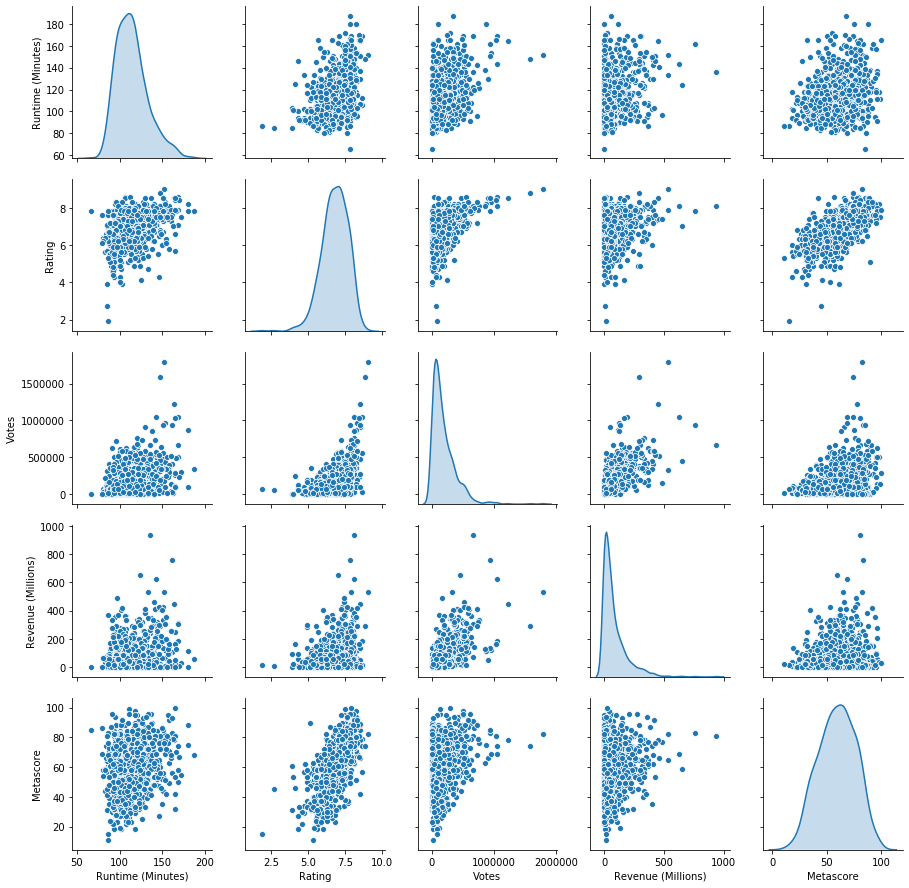

In [166]:
sns.pairplot(movies, diag_kind = 'kde')

**Relations** : 
1. Metascore vs Rating
2. Revenue vs Votes
3. Votes vs Rating

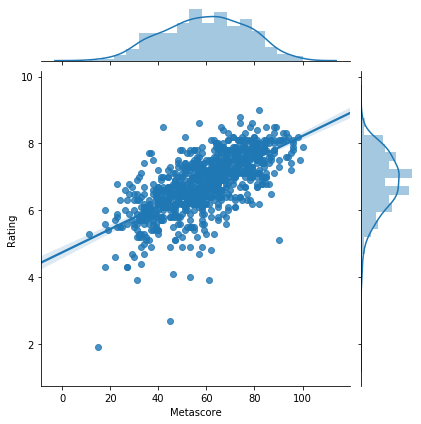

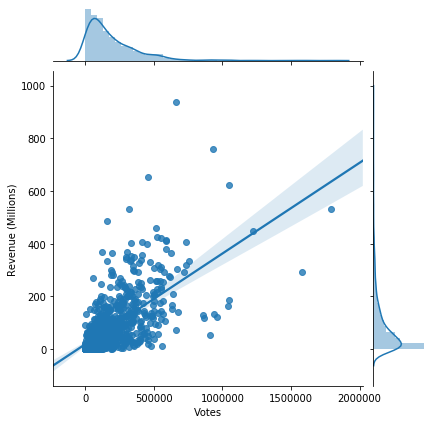

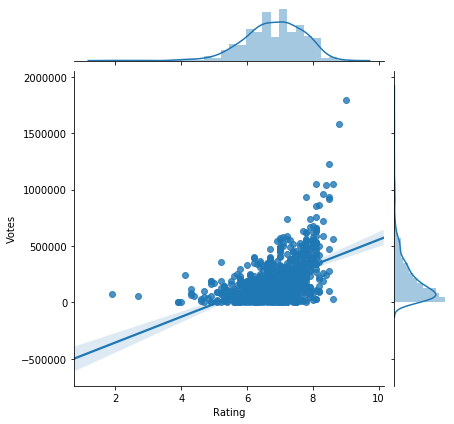

In [132]:
sns.jointplot(x = 'Metascore', y = 'Rating', data = movies, kind = 'reg')
sns.jointplot(x = 'Votes', y = 'Revenue (Millions)', data = movies, kind = 'reg')
sns.jointplot(x = 'Rating', y = 'Votes', data = movies, kind = 'reg')


**Conclusion**

1. **Metascore vs Rating**


> Metascore is directly related to the ratings.


2. **Revenue vs Votes**


> As the number of votes increases the revenue also increases. This maybe because the movie is popular and watched by people many times. But, the relation is still weak.


3. **Votes vs Rating**


> As the no of votes increases, the rating also increases, though the relation is quite weaker here.



<-------- **The END** ---------->